In [1]:
import matplotlib.pyplot as plt
import cv2
import sys
import numpy as np
sys.path.append("..")

from hydra.utils import instantiate
from hydra import initialize, compose
from tqdm import tqdm

from dataset.data_module import DataModule
from dataset.focusdataset import FocusingDataset
from dataset.transform import TrainFocusingTransform, TestFocusingTransform

In [2]:
with initialize(version_base=None, config_path="../configs/"):
    config = compose(overrides=["+db=mysql", "+dataset=rgb_dataset.yaml"])

In [3]:
datamodule = DataModule(config)

In [4]:
datamodule.prepare_data()
datamodule.setup("train")

In [5]:
train_dist = []
loader = datamodule.train_dataloader()

for images, target in tqdm(loader):
    train_dist.append(images.mean((0, 2, 3)).cpu().detach().numpy())

100%|███████████████████████████████████████████████████████████████████████████| 25739/25739 [00:36<00:00, 697.16it/s]


In [6]:
test_dist = []
loader = datamodule.test_dataloader()
for images, target in tqdm(loader.loaders["same_protocol"]):
    for j in range(images.shape[1]):
        test_dist.append(images[:, j].mean((0, 2, 3)).cpu().detach().numpy())

100%|████████████████████████████████████████████████████████████████████████████████| 328/328 [00:36<00:00,  8.90it/s]


In [9]:
len(test_dist), len(train_dist)

(29520, 25739)

(array([  47.,  277.,  990., 2746., 5008., 6722., 5887., 3137.,  859.,
          66.]),
 array([-0.73387051, -0.59597498, -0.45807946, -0.32018396, -0.18228844,
        -0.04439291,  0.0935026 ,  0.23139812,  0.36929363,  0.50718915,
         0.64508468]),
 <BarContainer object of 10 artists>)

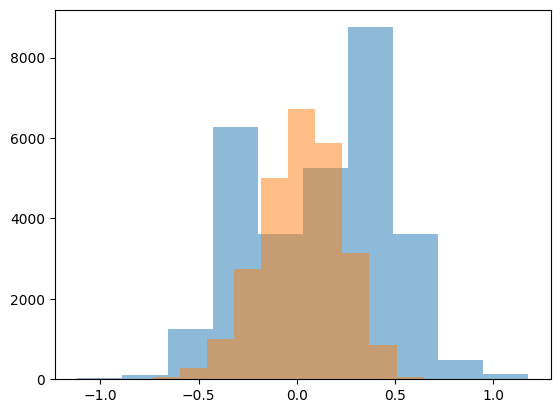

In [12]:
plt.hist(np.array(test_dist)[:, 1], alpha = 0.5)
plt.hist(np.array(train_dist)[:, 1], alpha = 0.5)

In [8]:
train_dist = []
for i in tqdm(range(len(datamodule.train_data_rgb))):
    image, _ = datamodule.train_data_rgb[i]
    train_dist.append(image.mean((1, 2)).cpu().detach().numpy())

100%|█████████████████████████████████████████████████████████████████████████| 102959/102959 [01:53<00:00, 903.49it/s]


In [9]:
test_dist = []
for i in tqdm(range(len(datamodule.test_data_same))):
    image, _ = datamodule.test_data_same[i] 
    for j in range(len(image)):
        test_dist.append(image[j].mean((1, 2)).cpu().detach().numpy())

100%|████████████████████████████████████████████████████████████████████████████████| 697/697 [01:19<00:00,  8.77it/s]


(array([  874.,  4249.,  4692.,  6053., 12018., 13879., 16433., 23065.,
        17775.,  3921.]),
 array([-0.72543657, -0.56069076, -0.39594489, -0.23119906, -0.06645322,
         0.09829262,  0.26303846,  0.42778429,  0.59253013,  0.75727594,
         0.92202181]),
 <BarContainer object of 10 artists>)

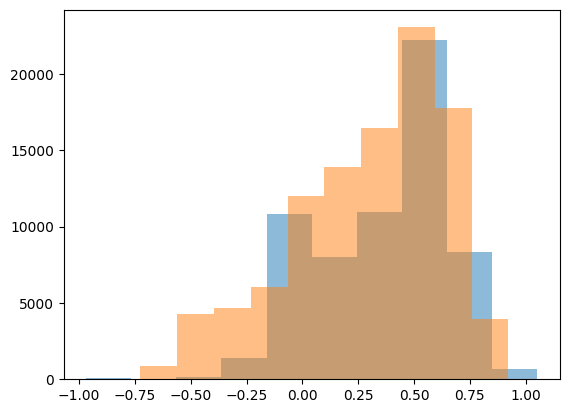

In [10]:
plt.hist(np.array(test_dist)[:, 0], alpha = 0.5)
plt.hist(np.array(train_dist)[:, 0], alpha = 0.5)

In [9]:
# plt.hist(np.array(val_dist)[:, 0], alpha = 0.5)
# plt.hist(np.array(train_dist)[np.random.choice(np.arange(len(train_dist)), 25666), 0], alpha = 0.5)

In [7]:
# val_images = datamodule.val_data_rgb[5][0]
# plt.imshow(val_images.permute(1,2,0))

In [16]:
train_loader = datamodule.train_dataloader()

In [17]:
images, target = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


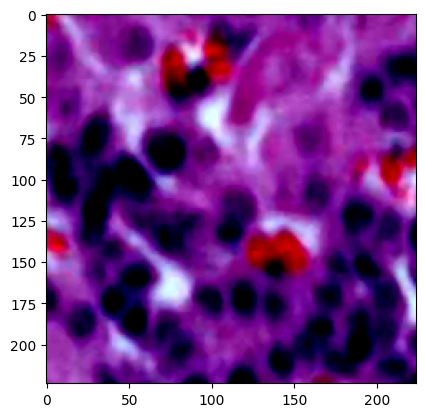

In [21]:
plt.imshow(images[3].permute(1, 2, 0))

In [5]:
loader = datamodule.test_dataloader()

In [6]:
for images, target in loader.loaders["same_protocol"]:
    break
    # for batch, target in v:
    #     batch.shape

In [22]:
import torch
torch.unique(images[0, 0])

tensor([-0.9678, -0.9503, -0.9328, -0.9153, -0.8978, -0.8803, -0.8627, -0.8452,
        -0.8277, -0.8102, -0.7927, -0.7752, -0.7577, -0.7402, -0.7227, -0.7052,
        -0.6877, -0.6702, -0.6527, -0.6352, -0.6176, -0.6001, -0.5826, -0.5651,
        -0.5476, -0.5301, -0.5126, -0.4951, -0.4776, -0.4601, -0.4426, -0.4251,
        -0.4076, -0.3901, -0.3883, -0.3725, -0.3712, -0.3550, -0.3541, -0.3375,
        -0.3369, -0.3200, -0.3198, -0.3027, -0.3025, -0.2881, -0.2856, -0.2850,
        -0.2707, -0.2684, -0.2675, -0.2532, -0.2513, -0.2500, -0.2358, -0.2342,
        -0.2325, -0.2184, -0.2171, -0.2150, -0.2010, -0.1999, -0.1975, -0.1835,
        -0.1828, -0.1800, -0.1661, -0.1657, -0.1625, -0.1487, -0.1486, -0.1450,
        -0.1314, -0.1312, -0.1275, -0.1143, -0.1138, -0.1099, -0.0972, -0.0964,
        -0.0924, -0.0801, -0.0790, -0.0749, -0.0629, -0.0615, -0.0574, -0.0458,
        -0.0441, -0.0399, -0.0287, -0.0267, -0.0224, -0.0116, -0.0092, -0.0049,
         0.0056,  0.0082,  0.0126,  0.02

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


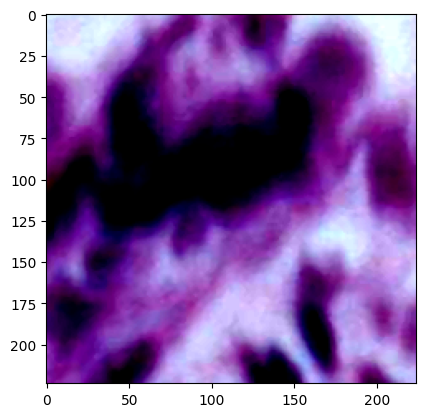

In [21]:
plt.imshow(images[0, 0].permute(1, 2, 0))

In [ ]:
means = []
stds = []

for path in tqdm(datamodule.rgb_data):
    path_str = str(path)
    image = cv2.imread(path_str)[:,:,::-1]
    means.append(image.mean(axis=(0, 1)))
    stds.append(image.std(axis=(0, 1)))

In [ ]:
np.array(means).mean(0), np.array(stds).mean(0)